In [ ]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

import re
import string

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix


from keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, Bidirectional, RNN, GRU, SimpleRNN

# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

###**Definamos primero nuestro conjunto de Stopwords que no incluya las negaciones:**

### Puedes usar el conjunto Stopwords por default que incluye las negaciones y al final el modelo sale como con 1% menor de accuracy.

In [ ]:
negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
mystopwords = [ w for w in stopwords.words('english') if w not in negwords]
print(mystopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [ ]:
mystopwords.extend(["themthat", "perfectlywould"])
print(mystopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

###**Cargamos la base de datos de Amazon_baby**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/data/nlp_data/" 

/content/drive/My Drive/data/nlp_data


In [ ]:
df1 = pd.read_csv("amazon_baby.csv")
df1.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [ ]:
df1.dropna(inplace=True)   # borra los renglones NaN con todo e índice, es decir, ahora se salta dicho índice.
df1.reset_index(drop=True,inplace=True)   # para que se reinicialicen los índices y no queden salteados.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182384 entries, 0 to 182383
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    182384 non-null  object
 1   review  182384 non-null  object
 2   rating  182384 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
df2 = df1[['review','rating']]

In [ ]:
my_df = df2.copy()   
my_df['rating'] = (df2['rating'] > 3).astype(int)

In [ ]:
my_df.head()

,review,rating
0,"These flannel wipes are OK, but in my opinion ...",0
1,it came early and was not disappointed. i love...,1
2,Very soft and comfortable and warmer than it l...,1
3,This is a product well worth the purchase. I ...,1
4,All of my kids have cried non-stop when I trie...,1


In [ ]:
X = my_df.review 
Y = my_df.rating

X.shape

(182384,)

In [ ]:
sum(Y) / len(Y)   # Están algo desbalanceadas las clases...

0.7638718308623563

In [ ]:
# Hacemos una limpieza mínima:
def clean_doc(doc):
  # split into tokens by white space
  tokens = doc.split()
  # prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  tokens = [re_punc.sub('', w) for w in tokens]
  # remove remaining tokens that are not alphabetic
  tokens = [word.lower() for word in tokens if word.isalpha()]
  # filter out stop words
  tokens = [w for w in tokens if not w in mystopwords] 
  # filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]  
  return tokens

### Al terminar la limpieza la RAM aumenta poquito: de 1.4 GB a 1.6 GB aprox

In [ ]:
Xclean = [clean_doc(s) for s in X]  # tarda menos de 1 min

In [ ]:
for k in range(3):
  print(Xclean[k])

['flannel', 'wipes', 'ok', 'opinion', 'not', 'worth', 'keeping', 'also', 'ordered', 'someimse', 'vimse', 'cloth', 'wipesocean', 'countwhich', 'larger', 'nicer', 'softer', 'texture', 'seemed', 'higher', 'quality', 'use', 'cloth', 'wipes', 'hands', 'faces', 'usingthirsties', 'pack', 'fab', 'wipes', 'boyfor', 'months', 'need', 'replace', 'starting', 'get', 'rough', 'stink', 'issues', 'stripping', 'no', 'longer', 'handles']
['came', 'early', 'not', 'disappointed', 'love', 'planet', 'wise', 'bags', 'wipe', 'holder', 'keps', 'osocozy', 'wipes', 'moist', 'not', 'leak', 'highly', 'recommend']
['soft', 'comfortable', 'warmer', 'looksfit', 'full', 'size', 'bed', 'recommend', 'anyone', 'looking', 'type', 'quilt']


In [ ]:
print(len(Xclean))
print(Y.shape)

182384
(182384,)


###**Train-Validation-Test**

In [ ]:
semilla = 17
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(Xclean, Y, train_size=.80,  random_state=semilla) 
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.50, random_state=semilla)

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_validation))
print(len(y_validation))
print(len(x_test))
print(len(y_test))

145907
145907
18238
18238
18239
18239


In [ ]:
for k in range(3):
  print(x_train[k])

['market', 'baby', 'gym', 'one', 'trick', 'highly', 'recommend', 'tiny', 'love', 'baby', 'gym', 'one', 'things', 'one', 'stand', 'one', 'person', 'mentioned', 'neat', 'star', 'eats', 'batteries', 'also', 'little', 'caterpillar', 'detaches', 'cutei', 'not', 'like', 'way', 'baby', 'gym', 'handles', 'putting', 'setting']
['read', 'reviews', 'purchasing', 'swing', 'like', 'others', 'concerned', 'first', 'set', 'saw', 'fast', 'seemed', 'swing', 'onemonth', 'old', 'however', 'didnt', 'seem', 'mind', 'bit', 'shes', 'loved', 'ever', 'since', 'shes', 'small', 'baby', 'headrest', 'wasnt', 'quite', 'enough', 'keep', 'tilting', 'times', 'placed', 'rolled', 'cloth', 'diaper', 'behind', 'side', 'add', 'extra', 'support', 'worked', 'like', 'charm']
['bumbleride', 'markets', 'indie', 'urban', 'jogger', 'states', 'used', 'jogging', 'miles', 'per', 'week', 'couple', 'months', 'light', 'jogging', 'indie', 'started', 'issues', 'year', 'shakes', 'horribly', 'bumbleride', 'amazing', 'customer', 'service', '

###**Construimos ahora nuestro vocabulario usando solamente los datos de entrenamiento:**

In [ ]:
mivocabulario = Counter()    # de la forma {(key:value)} --> {(word,freq)}

for k in range(len(x_train)):
  mivocabulario.update(x_train[k])

In [ ]:
print(len(mivocabulario))   
print(mivocabulario.most_common(10)) 

117210
[('not', 77663), ('one', 57838), ('baby', 57574), ('great', 46234), ('would', 45238), ('use', 41688), ('like', 40578), ('love', 34626), ('seat', 33854), ('little', 33209)]


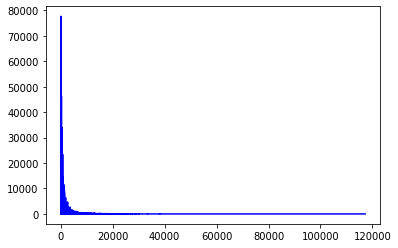

In [ ]:
# Veamos la gráfica de palabras nuestro diccionario en orden de mayor frecuencia:
plt.plot(list(np.arange(len(mivocabulario))), list(mivocabulario.values()), color='blue')
plt.show()

###**Descartemos palabras cuya frecuencia en el conjunto de entrenamiento es muy pequeña:**

In [ ]:
min_freq = 50  
#tmp = {}
tmp = [{k:c} for k,c in mivocabulario.items() if c >= min_freq]

mivocabulario2 = {}
for i in range(len(tmp)):
  mivocabulario2.update(tmp[i])

print(len(mivocabulario2))  # reducimos el tamaño del vocabulario....
print(1-len(mivocabulario2)/len(mivocabulario))   # porcentaje de reducción...

6209
0.9470267042061258


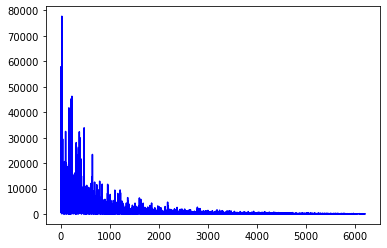

In [ ]:
plt.plot(list(np.arange(len(mivocabulario2))), list(mivocabulario2.values()), color='blue')
plt.show()

In [ ]:
total_words = len(mivocabulario2)
total_words

6209

###**Filtremos los conjuntos Train, Validation y Test con respecto al nuestro vocabulario de palabras:**

In [ ]:
train_x = []

for ss in x_train:
  train_x.append([w for w in ss if w in mivocabulario2])

In [ ]:
for k in range(3):
  print(x_train[k])
  print(train_x[k])

['market', 'baby', 'gym', 'one', 'trick', 'highly', 'recommend', 'tiny', 'love', 'baby', 'gym', 'one', 'things', 'one', 'stand', 'one', 'person', 'mentioned', 'neat', 'star', 'eats', 'batteries', 'also', 'little', 'caterpillar', 'detaches', 'cutei', 'not', 'like', 'way', 'baby', 'gym', 'handles', 'putting', 'setting']
['market', 'baby', 'gym', 'one', 'trick', 'highly', 'recommend', 'tiny', 'love', 'baby', 'gym', 'one', 'things', 'one', 'stand', 'one', 'person', 'mentioned', 'neat', 'star', 'eats', 'batteries', 'also', 'little', 'caterpillar', 'detaches', 'not', 'like', 'way', 'baby', 'gym', 'handles', 'putting', 'setting']
['read', 'reviews', 'purchasing', 'swing', 'like', 'others', 'concerned', 'first', 'set', 'saw', 'fast', 'seemed', 'swing', 'onemonth', 'old', 'however', 'didnt', 'seem', 'mind', 'bit', 'shes', 'loved', 'ever', 'since', 'shes', 'small', 'baby', 'headrest', 'wasnt', 'quite', 'enough', 'keep', 'tilting', 'times', 'placed', 'rolled', 'cloth', 'diaper', 'behind', 'side',

In [ ]:
validation_x = []

for ss in x_validation:
  validation_x.append([w for w in ss if w in mivocabulario2])

In [ ]:
for k in range(3):
  print(x_validation[k])
  print(validation_x[k])

['whole', 'point', 'going', 'stainless', 'steel', 'not', 'plastic', 'parts', 'would', 'preferred', 'less', 'plastic', 'inside', 'facing', 'part', 'lid', 'getting', 'truly', 'stainless', 'steel', 'container', 'natural', 'gasket', 'really', 'hard']
['whole', 'point', 'going', 'stainless', 'steel', 'not', 'plastic', 'parts', 'would', 'preferred', 'less', 'plastic', 'inside', 'facing', 'part', 'lid', 'getting', 'truly', 'stainless', 'steel', 'container', 'natural', 'really', 'hard']
['year', 'old', 'daughter', 'picked', 'cute', 'design', 'soft', 'straps', 'keep', 'falling', 'offer', 'shoulders', 'wish', 'came', 'clasp', 'across', 'chest']
['year', 'old', 'daughter', 'picked', 'cute', 'design', 'soft', 'straps', 'keep', 'falling', 'offer', 'shoulders', 'wish', 'came', 'clasp', 'across', 'chest']
['life', 'saver', 'twin', 'moms', 'go', 'use', 'stroller', 'rides', 'car', 'rides', 'took', 'months', 'babies', 'suck', 'hard', 'enough', 'work', 'complaint']
['life', 'saver', 'twin', 'moms', 'go',

In [ ]:
test_x = []

for ss in x_test:
  test_x.append([w for w in ss if w in mivocabulario2])

In [ ]:
for k in range(3):
  print(x_test[k])
  print(test_x[k])

['would', 'recomend', 'product', 'anyone', 'wrestle', 'child', 'regular', 'nose', 'sucker', 'music', 'plays', 'use', 'month', 'old', 'didnt', 'fight', 'actually', 'smiled', 'whenever', 'showed', 'really', 'works', 'great']
['would', 'recomend', 'product', 'anyone', 'wrestle', 'child', 'regular', 'nose', 'sucker', 'music', 'plays', 'use', 'month', 'old', 'didnt', 'fight', 'actually', 'whenever', 'showed', 'really', 'works', 'great']
['item', 'must', 'babies', 'wish', 'brought', 'older', 'kid', 'initially', 'husband', 'thinking', 'get', 'tools', 'fix', 'thing', 'somewhere', 'part', 'not', 'clear', 'description', 'item', 'later', 'saw', 'video', 'demonstration', 'went', 'ahead', 'ordered', 'itit', 'flexible', 'hooked', 'door', 'removed', 'jiffy', 'put', 'back', 'without', 'nuts', 'bolts', 'drilling', 'long', 'doorway', 'frame', 'works', 'saves', 'back', 'giving', 'little', 'one', 'great', 'exercise', 'neat', 'conceptthe', 'modification', 'add', 'padding', 'clamps', 'paint', 'would', 'not'

In [ ]:
len(test_x)

18239

###**matrices Tf-idf --> En este ya no usaremos Tf-idf**

### Para obtener las matrices sparse debe estar de nuevo cada comentario/documento en un solo string:



In [ ]:
train_x_docs = []

for k in range(len(train_x)):
  train_x_docs.append(' '.join(train_x[k]))

In [ ]:
for k in range(3):
  print(train_x_docs[k])

market baby gym one trick highly recommend tiny love baby gym one things one stand one person mentioned neat star eats batteries also little caterpillar detaches not like way baby gym handles putting setting
read reviews purchasing swing like others concerned first set saw fast seemed swing old however didnt seem mind bit shes loved ever since shes small baby headrest wasnt quite enough keep tilting times placed rolled cloth diaper behind side add extra support worked like charm
bumbleride indie urban jogger states used jogging miles per week couple months light jogging indie started issues year shakes horribly bumbleride amazing customer service though working fix issues theyve sent new back new wheels finally new frame get stars customer service youre not using jogging stroller love jog get bob


In [ ]:
validation_x_docs = []

for k in range(len(validation_x)):
  validation_x_docs.append(' '.join(validation_x[k]))

In [ ]:
test_x_docs = []

for k in range(len(test_x)):
  test_x_docs.append(' '.join(test_x[k]))

In [ ]:
len(test_x_docs)

18239

##TOKENIZER

### Con Tf-Idf se hace la conversión de letras a números con la fórmula de de tf-idf... aqui, con TOKENIZER es otra forma... y que los agrupa por frecuencias... es decir, los de mayor frecuencia primero...

Ver:

https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)

#tokenizer = Tokenizer(num_words=total_words, oov_token='UNK')   # esta es la otra forma, de no descartar las palabras nuevas, 
                                                                 # sino que se identificarán con el token OOV (Out-Of-Vocabulary)

tokenizer.fit_on_texts(train_x_docs)

train_sequences = tokenizer.texts_to_sequences(train_x_docs)

validation_sequences = tokenizer.texts_to_sequences(validation_x_docs)

test_sequences = tokenizer.texts_to_sequences(test_x_docs)

In [ ]:
tokenizer.num_words  # son las mismas que el vocabulario

6209

In [ ]:
tokenizer.index_word   # están indexadas por frecuencia, de manera descendente.

{1: 'not',
 2: 'one',
 3: 'baby',
 4: 'great',
 5: 'would',
 6: 'use',
 7: 'like',
 8: 'love',
 9: 'seat',
 10: 'little',
 11: 'get',
 12: 'easy',
 13: 'well',
 14: 'old',
 15: 'really',
 16: 'also',
 17: 'product',
 18: 'time',
 19: 'bought',
 20: 'no',
 21: 'son',
 22: 'much',
 23: 'dont',
 24: 'good',
 25: 'put',
 26: 'months',
 27: 'stroller',
 28: 'daughter',
 29: 'back',
 30: 'even',
 31: 'used',
 32: 'first',
 33: 'still',
 34: 'car',
 35: 'loves',
 36: 'recommend',
 37: 'bag',
 38: 'got',
 39: 'two',
 40: 'im',
 41: 'nice',
 42: 'could',
 43: 'using',
 44: 'fit',
 45: 'doesnt',
 46: 'around',
 47: 'buy',
 48: 'enough',
 49: 'perfect',
 50: 'didnt',
 51: 'work',
 52: 'since',
 53: 'way',
 54: 'small',
 55: 'made',
 56: 'keep',
 57: 'price',
 58: 'go',
 59: 'diaper',
 60: 'better',
 61: 'make',
 62: 'month',
 63: 'think',
 64: 'child',
 65: 'size',
 66: 'room',
 67: 'need',
 68: 'take',
 69: 'works',
 70: 'big',
 71: 'quality',
 72: 'thing',
 73: 'soft',
 74: 'crib',
 75: 'easily

In [ ]:
tokenizer.index_word[3]

'baby'

In [ ]:
tokenizer.word_index['baby']

3

In [ ]:
print("The document and its encoding:\n",train_x_docs[0], '\n', train_sequences[0])

The document and its encoding:
 market baby gym one trick highly recommend tiny love baby gym one things one stand one person mentioned neat star eats batteries also little caterpillar detaches not like way baby gym handles putting setting 
 [878, 3, 1296, 2, 1383, 166, 36, 615, 8, 3, 1296, 2, 150, 2, 502, 2, 682, 903, 1657, 637, 2091, 430, 16, 10, 4626, 5043, 1, 7, 53, 3, 1296, 607, 372, 704]


In [ ]:
len(train_sequences)  # siguen siendo el mismo nuumero de renglones inicial de los de entrenamiento.

145907

In [ ]:
# Add padding, "post" or "pre": 
padded_train = pad_sequences(train_sequences, maxlen = 40, padding = 'post', truncating = 'post')

padded_validation = pad_sequences(validation_sequences, maxlen = 40, padding = 'post', truncating = 'post')

padded_test = pad_sequences(test_sequences, maxlen = 40,  padding = 'post', truncating = 'post') 

In [ ]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1,"is:\n",doc)

The padded encoding for document 1 is:
 [ 878    3 1296    2 1383  166   36  615    8    3 1296    2  150    2
  502    2  682  903 1657  637 2091  430   16   10 4626 5043    1    7
   53    3 1296  607  372  704    0    0    0    0    0    0]
The padded encoding for document 2 is:
 [ 268  147  633  215    7  286 1036   32   88  533  414  447  215   14
  122   50  261  477   95  381  144  273   52  381   54    3 1678  256
  211   48   56 6089  158  935 1770  269   59  821   86  600]


### ... hasta aquí no hay problema con la RAM porque hasta aquí no se han generado Matrices o Array 2D... esto es lo costoso para la RAM...

###A continuación vienen ahora sí las matrices/Array... pero como los vectores embedding son de dimensión generalmente de decenas o cuando muhco cientos, las matrices son muy pequeñas, comparadas con las generadas por las Tf-Idf

In [ ]:
print(padded_train.shape)
print(padded_test.shape)

(145907, 40)
(18239, 40)


In [ ]:
145907 * 40 * 8

46690240

In [ ]:
y_train_arr = np.asarray(y_train)    # de Series --> array
y_validation_arr = np.asarray(y_validation)
y_test_arr = np.asarray(y_test) 

In [ ]:
y_train

9651      0
12675     1
150130    0
45019     1
143066    1
         ..
25631     1
125680    1
42297     1
34959     1
64753     1
Name: rating, Length: 145907, dtype: int64

In [ ]:
y_train_arr

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
# veamos qué tan bien quedaron repartidas las clases en cada conjunto:
print(sum(Y)/len(Y))

print(sum(y_train)/len(y_train))
print(sum(y_validation)/len(y_validation))
print(sum(y_test)/len(y_test))

0.7638718308623563
0.7632190367837047
0.7660379427568812
0.766928011404134


In [ ]:
model = Sequential()

# embeddidng layer
model.add(Embedding(input_dim=total_words, output_dim = 128, embeddings_initializer='uniform'))

##model.add(SimpleRNN(128, return_sequences=True))   # si quieres anidar varios RNN...
#model.add(SimpleRNN(128))

#model.add(GRU(128, return_sequences=True))
#model.add(GRU(128))

##model.add(LSTM(128, return_sequences=True))
#model.add(LSTM(128))



# Bi-Directionals:

#model.add(Bidirectional(SimpleRNN(128)))

model.add(Bidirectional(GRU(128)))

#model.add(Bidirectional(LSTM(128, return_sequences=True)))
#model.add(Bidirectional(LSTM(128)))



# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         794752    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               198144    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,025,921
Trainable params: 1,025,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_epochs = 2
n_batch = 128

In [ ]:
#H = model.fit(padded_train, y_train_arr, batch_size = n_batch, validation_split = 0.1, epochs = n_epochs)      # esta opcioon crea aquii su validation-test...

H = model.fit(padded_train, y_train_arr, batch_size = n_batch, validation_data=(padded_validation, y_validation_arr), epochs = n_epochs)  

Epoch 1/2
1140/1140 [==============================] - 55s 19ms/step - loss: 0.3683 - acc: 0.8366 - val_loss: 0.2836 - val_acc: 0.8780
Epoch 2/2
1140/1140 [==============================] - 20s 18ms/step - loss: 0.2561 - acc: 0.8950 - val_loss: 0.2650 - val_acc: 0.8894


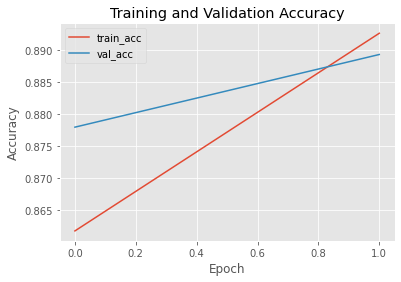

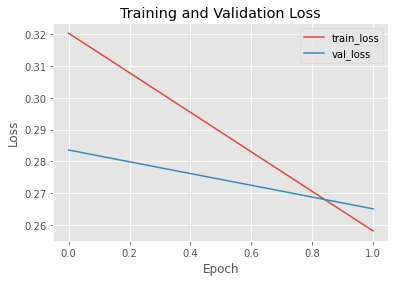

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["acc"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_acc"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
# make prediction
pred = model.predict(padded_test)

In [ ]:
padded_test.shape

(18239, 40)

In [ ]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:  # podemos buscar el mejor umbral...
        prediction.append(1)
    else:
        prediction.append(0)

In [ ]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test_arr), prediction)  

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.8820659027358956


In [ ]:
# se puede calcular de manera más sencilla, pero por default el umbral es 0.5
predic = np.round(pred)
accuracy_score(list(y_test_arr), predic) 

0.8820659027358956

In [ ]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test_arr), prediction)
print(cm)


[[ 2930  1321]
 [  830 13158]]
